## TUGAS PRAKTIKUM
* Septi Lutfiana
* 2141720038
* TI-3H

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

Tugas 1: Multiple Linear Regression

# 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [6]:
# jawaban no 1
# import package
import numpy as np
import pandas as pd

In [7]:
# baca data
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# jawab 1
Berdasarkan analisis diatas variabel bebas terdiri atas:
- Age (umur individu yang melakukan asuransi dapat mempengarui biaya yang dikeluarkan, karena semakin tua umur individu maka biaya yang dikeluarkan juga semakin tinggi)
- bmi ( Indeks massa tubuh (IMT) adalah ukuran yang menggambarkan proporsi berat badan terhadap tinggi badan. IMT yang tinggi dapat mempengaruhi risiko kesehatan tertentu dan dapat mempengaruhi biaya medis.)
- sek (jenis kelamin individu, jenis kelamin dari setiap individu juga mempengaruhi biaya kesehatan atau asuransi yang dikeluarkan, contohnya perempuan membutuhkan asuransi seperti kelahiran)
- smoker (Kebiasaan merokok dapat mempengaruhi pada risiko kesehatan yang lebih tinggi dan biaya perawatan kesehatan yang lebih besar)
- region (Lokasi geografis individu dapat mempengaruhi biaya medis personal. Perbedaan biaya kesehatan dapat terjadi antara wilayah perkotaan dan pedesaan, serta antara negara bagian atau negara.)
- children (jumlah anak dapat mempengaruhi jumlah asuransi yang dibayarkan nantinya)

Berdasarkan analisis diatas variabel target terdiri atas:
- charges ( mencakup jumlah biaya medis yang dikeluarkan oleh individu atau keluarganya)

# 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [9]:
from sklearn.model_selection import train_test_split

# Memisahkan variabel-variabel bebas (fitur) dan variabel target (biaya)
X = data.drop('charges', axis=1)  # Variabel bebas
y = data['charges']  # Variabel target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X merupakan variabel-variabel bebas (fitur) dari dataset, sedangkan y merupakan variabel target (biaya).

Fungsi train_test_split digunakan untuk membagi data menjadi data latih dan data uji

test_size=0.2 menunjukkan bahwa data uji akan memiliki proporsi 20% dari keseluruhan dataset, sedangkan random_state=42 digunakan untuk menghasilkan pembagian yang konsisten setiap kali kode dijalankan.

In [10]:
print("Dimensi data latih (X_train):", X_train.shape)
print("Dimensi data uji (X_test):", X_test.shape)
print("Dimensi variabel target latih (y_train):", y_train.shape)
print("Dimensi variabel target uji (y_test):", y_test.shape)

Dimensi data latih (X_train): (1070, 6)
Dimensi data uji (X_test): (268, 6)
Dimensi variabel target latih (y_train): (1070,)
Dimensi variabel target uji (y_test): (268,)


In [11]:
print("Sampel data latih:")
print(X_train.head())  # Menampilkan beberapa baris pertama dari data latih

print("\nSampel data uji:")
print(X_test.head())  # Menampilkan beberapa baris pertama dari data uji

Sampel data latih:
      age     sex    bmi  children smoker     region
560    46  female  19.95         2     no  northwest
1285   47  female  24.32         0     no  northeast
1142   52  female  24.86         0     no  southeast
969    39  female  34.32         5     no  southeast
486    54  female  21.47         3     no  northwest

Sampel data uji:
      age     sex     bmi  children smoker     region
764    45  female  25.175         2     no  northeast
887    36  female  30.020         0     no  northwest
890    64  female  26.885         0    yes  northwest
1293   46    male  25.745         3     no  northwest
259    19    male  31.920         0    yes  northwest


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#pisahkan variabel target (charges) dan variabel bebas (fitur)
X = data[['age', 'bmi', 'children']]  # Kolom fitur
y = data['charges']  # Kolom target

#membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# menampilkan jumlah baris dalam setiap subset
print("Jumlah data latih: ", len(X_train))
print("Jumlah data uji: ", len(X_test))

Jumlah data latih:  936
Jumlah data uji:  402


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


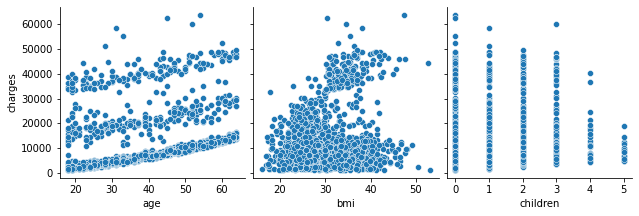

In [33]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

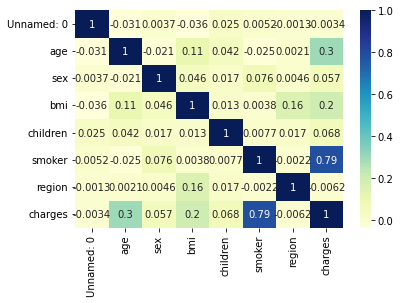

In [37]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# 3. Lakukan feature scaling jika diperlukan.

sebelum melakukan scaling perlu dilakukan tahap encoding terlebih dahulu, hal ini dikarenakan untuk mengubah data yang non numerik menjadi numerik seperti sek, smoker dan region

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [16]:
data.to_csv('asuransi_final.csv')

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [59]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [40]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)
support_vector_reg.fit(x_train, y_train)

SVR(C=1000, gamma='auto', kernel='linear')

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menambahkan kolom konstanta pada fitur data latih
X_train_sm = sm.add_constant(X_train)

# Melatih model dengan OLS
lr = sm.OLS(y_train, X_train_sm).fit()

# Menambahkan kolom konstanta pada fitur data uji
X_test_sm = sm.add_constant(X_test)

# Melakukan prediksi pada data uji
y_pred = lr.predict(X_test_sm)

In [51]:
print("Hasil Prediksi:")
print(y_pred)

Hasil Prediksi:
764     13305.289459
887     11801.951701
890     16941.714371
1293    14278.422069
259      8680.254394
            ...     
109     19446.677920
575     15711.845484
535     12143.742725
543     21552.592534
846     17064.943964
Length: 268, dtype: float64


# 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [58]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Menerapkan penskalaan fitur
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Melatih model SVR
svr = SVR()
svr.fit(x_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = svr.predict(x_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 166530007.18088558
Mean Absolute Error (MAE): 8600.875069585998
Coefficient of Determination (R^2): -0.07266581556390928
